In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Import helper files
from helper_clustering import import_data

# Import numpy module
import numpy as np

# Import pandas module
import pandas as pd

# Import zipfile module
import zipfile
         
images_zip = zipfile.ZipFile('images.zip')
images_zip.extractall('Images')
 
images_zip.close()

In [2]:
# Import the dataset
# Reading the csv file:
data = pd.read_csv('labels_data.csv')

train_labels_kmeans = np.array(data['kmeans'])
train_labels_gmm = np.array(data['gmm'])
train_images = import_data("Images", 'Save_15K')

# Normalization of the pixels values so that they are between 0 and 1
train_images = train_images/255

### Neural Network using Kmeans labels for training

In [19]:
# Creation of the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 160, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [20]:
# Summary of our model by the moment
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 158, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 77, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 36, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 18, 64)      

In [21]:
# Add dense layers on top of our nn
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
# Summary of our model by the moment
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 158, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 77, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 36, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 18, 64)      

In [23]:
# Compilation and training of our model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_kmeans, epochs=10)#, 
                    #validation_data=(test_images, test_labels))

Epoch 1/10
113/113 [==============================] - 112s 980ms/step - loss: 1.4494 - accuracy: 0.2814
Epoch 2/10
113/113 [==============================] - 110s 974ms/step - loss: 1.3912 - accuracy: 0.2886
Epoch 3/10
113/113 [==============================] - 109s 968ms/step - loss: 1.3961 - accuracy: 0.2797
Epoch 4/10
113/113 [==============================] - 110s 970ms/step - loss: 1.3845 - accuracy: 0.2828
Epoch 5/10
113/113 [==============================] - 111s 982ms/step - loss: 1.3825 - accuracy: 0.2894
Epoch 6/10
113/113 [==============================] - 111s 978ms/step - loss: 1.3852 - accuracy: 0.2858
Epoch 7/10
113/113 [==============================] - 111s 984ms/step - loss: 1.3811 - accuracy: 0.2989
Epoch 8/10
113/113 [==============================] - 110s 970ms/step - loss: 1.3826 - accuracy: 0.2803
Epoch 9/10
113/113 [==============================] - 109s 968ms/step - loss: 1.3799 - accuracy: 0.2944
Epoch 10/10
113/113 [==============================] - 109s 967m

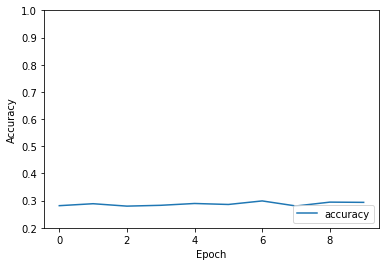

In [24]:
# Evaluation of our model
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

### Neural Network using GMM labels for training

In [25]:
# Creation of the convolutional base
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 160, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

In [26]:
# Summary of our model by the moment
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 126, 158, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 77, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 36, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 18, 64)      

In [27]:
# Add dense layers on top of our nn
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

In [28]:
# Summary of our model by the moment
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 126, 158, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 77, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 36, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 18, 64)      

In [29]:
# Compilation and training of our model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels_gmm, epochs=10)

Epoch 1/10
113/113 [==============================] - 114s 1s/step - loss: 1.4001 - accuracy: 0.4158
Epoch 2/10
113/113 [==============================] - 113s 1s/step - loss: 1.2973 - accuracy: 0.4328
Epoch 3/10
113/113 [==============================] - 114s 1s/step - loss: 1.2872 - accuracy: 0.4447
Epoch 4/10
113/113 [==============================] - 114s 1s/step - loss: 1.2882 - accuracy: 0.4386
Epoch 5/10
113/113 [==============================] - 113s 1s/step - loss: 1.2873 - accuracy: 0.4272
Epoch 6/10
113/113 [==============================] - 113s 999ms/step - loss: 1.2774 - accuracy: 0.4469
Epoch 7/10
113/113 [==============================] - 115s 1s/step - loss: 1.2799 - accuracy: 0.4469
Epoch 8/10
113/113 [==============================] - 114s 1s/step - loss: 1.2828 - accuracy: 0.4469
Epoch 9/10
113/113 [==============================] - 112s 989ms/step - loss: 1.2791 - accuracy: 0.4469
Epoch 10/10
113/113 [==============================] - 110s 976ms/step - loss: 1.2778

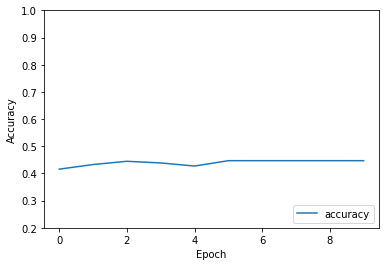

In [30]:
# Evaluation of our model
plt.plot(history2.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')